Hey

In [1]:
import pandas as pd
import lightgbm as ltb
import numpy as np
import re


from scipy.stats import linregress
import scipy.linalg

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA


from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
from sklearn import preprocessing

import joblib

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')


%matplotlib inline
%config InlineBackend.figure_format = 'svg'


# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5



In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_seq_items', 1000)

In [3]:
#MY COMPUTER

#READING INITIAL TRAIN DATA
# data_traff_train = pd.read_sas('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data/train/hash_school_dpi_model_traff.sas7bdat')
# data_train = pd.read_sas('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data/train/hash_school_dpi_model_fe.sas7bdat')

#READING INITIAL TEST DATA
# data_traff_test = pd.read_sas('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data/test/hash_school_dpi_model_traff_test.sas7bdat')
# data_test = pd.read_sas('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data/test/hash_school_dpi_model_fe_test.sas7bdat')
# data_test2 = pd.read_sas('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data/test/hash_school_dpi_model_test.sas7bdat')


#WRITING MERGED TRAIN AND TEST DATA TO PARQUET
# data_train.to_parquet('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data_parquet/train/data_train.parquet.gzip',compression='gzip')
# data_test.to_parquet('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data_parquet/test/data_test.parquet.gzip',compression='gzip')

# # READING INITIAL TRAIN AND TEST DATA FROM PARQUET
data_train = pd.read_parquet('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data_parquet/train/data_train.parquet.gzip')
data_test = pd.read_parquet('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data_parquet/test/data_test.parquet.gzip')


In [187]:
# ED'S COMPUTER

# READING INITIAL TRAIN DATA
# data_traff_train = pd.read_sas('C:/Users/Edward/Documents/Appleolga/Final_pro/model2/train/hash_school_dpi_model_traff.sas7bdat')
# data_train = pd.read_sas('C:/Users/Edward/Documents/Appleolga/Final_pro/model2/train/hash_school_dpi_model_fe.sas7bdat')

#WRITING INITIAL TRAIN DATA TO PARQUET
# data_traff.to_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/train/hash_school_dpi_model_traff.parquet.gzip',compression='gzip')
# 

# READING INITIAL TEST DATA
# data_traff_test = pd.read_sas('C:/Users/Edward/Documents/Appleolga/Final_pro/model2/test/hash_school_dpi_model_traff_test.sas7bdat')
# data_test = pd.read_sas('C:/Users/Edward/Documents/Appleolga/Final_pro/model2/test/hash_school_dpi_model_fe_test.sas7bdat')
# data_test2 = pd.read_sas('C:/Users/Edward/Documents/Appleolga/Final_pro/model2/test/hash_school_dpi_model_test.sas7bdat')

#WRITING MERGED TRAIN AND TEST DATA TO PARQUET
# data_train.to_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/train/data_train.parquet.gzip',compression='gzip')
# data_test.to_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/test/data_test.parquet.gzip',compression='gzip')

# READING INITIAL TRAIN AND TEST DATA FROM PARQUET
data_train= pd.read_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/train/data_train.parquet.gzip')
data_test = pd.read_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/test/data_test.parquet.gzip')





In [ ]:
#DUPLICATES CLEANING AND MERGING INITIAL DATA FILES

# print(data_train.shape)
# print(data_traff_train.shape)
# data_traff_train = data_traff_train.drop_duplicates()
# data_train = data_train.drop_duplicates()
# print(data_train.shape)
# print(data_traff_train.shape)

# data_train = data_train.merge(data_traff_train, on = 'abon_id')
# del data_traff_train

# print(data_test.shape)
# print(data_test2.shape)
# print(data_traff_test.shape)
# data_test = data_test.drop_duplicates()
# data_test2 = data_test2.drop_duplicates()
# data_traff_test = data_traff_test.drop_duplicates()
# print(data_test.shape)
# print(data_test2.shape)
# print(data_traff_test.shape)

# data_test = data_test.merge(data_test2, on = 'abon_id').merge(data_traff_test, on = 'abon_id')
# del data_test2
# del data_traff_test


In [5]:
#Marking categorical columns

def find_cat_cols (df):
    
    cat_cols_list = pd.DataFrame(columns = ['col_name', 'if_cat'])
    
    df_length = df.shape[0]
    
    for col in df.columns:
        
        value_count_info = df[col].value_counts().sort_values(ascending = False)
        
        if (np.array_equal(value_count_info.index, [1,0]) or np.array_equal(value_count_info.index,[0,1])):
            if_cat = 1 
        else: 
            if_cat = 0
            
        cat_cols_list = cat_cols_list.append({'col_name': col, 'if_cat' : if_cat}, ignore_index=True)
        
    return cat_cols_list


In [6]:
cat_num_col_list = find_cat_cols(data_train)
cat_col_list = list(cat_num_col_list[cat_num_col_list['if_cat'] == 1]['col_name'].values)
num_col_list = list(cat_num_col_list[cat_num_col_list['if_cat'] == 0]['col_name'].values)
print(len(cat_col_list))
print(len(num_col_list))

32
879


In [7]:
data_train_num = data_train[num_col_list]
data_test_num = data_test[num_col_list]

In [10]:
traffic_cols = ['traff_m5', 'traff_m3','traff_m2','traff_m1']

In [11]:
# CALCULATION OF TRAFFIC VARIANCE AND LIN.REGR. SLOPE FOR EACH OBSERVATION

data_train_num = data_train_num.assign(var = data_train_num[traffic_cols].apply(lambda x: x.var(), axis=1))
data_train_num = data_train_num.assign(var_quant = pd.qcut(data_train_num['var'], 10,labels = False))

data_test_num = data_test_num.assign(var = data_test_num[traffic_cols].apply(lambda x: x.var(), axis=1))
data_test_num = data_test_num.assign(var_quant = pd.qcut(data_test_num['var'], 10,labels = False))

enum = np.arange(1, len(traffic_cols)+1, 1)
data_train_num = data_train_num.assign(slope_traff = data_train_num.apply(lambda x: linregress(enum, 
                                                                                               x[traffic_cols]).slope, 
                                                                          axis=1))

data_test_num = data_test_num.assign(slope_traff = data_test_num.apply(lambda x: linregress(enum, 
                                                                                            x[traffic_cols]).slope, 
                                                                       axis=1))


In [13]:
# WRITING TRAIN AND TEST DATA WITH VARIANCE AND QUANTILES TO PARQUET

#MY COMPUTER
data_train_num.to_parquet('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data_parquet/data_train_num.parquet.gzip',compression='gzip')
data_test_num.to_parquet('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data_parquet/data_test_num.parquet.gzip',compression='gzip')

#ED's COMPUTER
# data_train_num.to_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/data_train_num.parquet.gzip',compression='gzip')
# data_test_num.to_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/data_test_num.parquet.gzip',compression='gzip')


In [38]:
# READING TRAIN AND TEST DATA WITH VARIANCE AND QUANTILES FROM PARQUET

#MY COMPUTER
data_train_num= pd.read_parquet('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data_parquet/data_train_num.parquet.gzip')
data_test_num= pd.read_parquet('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data_parquet/data_test_num.parquet.gzip')

#ED's COMPUTER
# data_train_num= pd.read_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/data_train_num.parquet.gzip')
# data_test_num= pd.read_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/data_test_num.parquet.gzip')

data_train_num = data_train_num.astype('float32')
data_test_num = data_test_num.astype('float32')

In [8]:
def mark_outliers(df, outlier_coeff = 1.5): 
    
    outliers_mask = df.copy()
    counter = 1
    for col in df.columns:
        
        p75, p25 = df[col].quantile(0.75), df[col].quantile(0.25)
        IQR_col = p75 - p25
        upper, lower = p75 + outlier_coeff*IQR_col, p25 - outlier_coeff*IQR_col
        outliers_mask[col] = df[col].apply(lambda x: True if(x > upper or x < lower) else False)
        
        if (counter%100 == 0):
            print(counter)
        counter += 1
        
    return outliers_mask        
        
# # test = pd.DataFrame(data = np.array([1,2,5,100,2,5,1000]), columns = ['test'])
# # mark_outliers(test, test)

def df_info (df, outliers_mask_df):
    
    df_info = pd.DataFrame(columns=['col', '%of_fr_univalue', '%of_unfr_univalue','freq_value', '%outliers', '%nans'])
    
    df_length = df.shape[0]
    
    for col in df.columns:
        
        value_count_info = df[col].value_counts().sort_values(ascending = False)
        
        freq_value = value_count_info.index[0]
        freq_value_count = value_count_info.iloc[0]/df_length
        #print(freq_value_count)
        try:
            unfreq_value_count = value_count_info.iloc[1]/df_length
        except:
            unfreq_value_count = np.nan
        #print(unfreq_value_count)
        perc_outl = outliers_mask_df[col].sum()/df_length
        perc_nans = df[col].isnull().sum()/df_length
        
        #print(freq_count)
        df_info = df_info.append({'col': col, 
                                  '%of_fr_univalue': freq_value_count,
                                  '%of_unfr_univalue': unfreq_value_count,
                                  '%outliers': perc_outl,
                                  '%nans': perc_nans,
                                  'freq_value': freq_value}, 
                                 ignore_index=True)
        
    return df_info.sort_values(by = ['%of_fr_univalue', '%outliers','%nans'], ascending=False) 

In [ ]:
# data_train_num_outliers_mask = mark_outliers(data_train_num)
# data_train_num_info = df_info(data_train_num, data_train_num_outliers_mask)
# del data_train_num_outliers_mask

In [ ]:
# data_train_num_corr = data_train_num.corr()

In [ ]:
# WRITING DATA_TRAIN_NUM CORRELATION TO PARQUET

#MY COMPUTER
# data_train_num_corr.to_parquet('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data_parquet/data_train_num_corr.parquet.gzip',compression='gzip')

#ED's COMPUTER
# data_train_num_corr.to_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/data_train_num_corr.parquet.gzip',compression='gzip')


In [19]:
# READING DATA_TRAIN_NUM CORRELATION FROM PARQUET

#MY COMPUTER
data_train_num_corr = pd.read_parquet('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data_parquet/data_train_num_corr.parquet.gzip')

#ED's COMPUTER
# data_train_num_corr = pd.read_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/data_train_num_corr.parquet.gzip')


In [ ]:
# WRITING TRAIN DATA INFO DF TO PARQUET

#MY COMPUTER
# data_train_num_info.to_parquet('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data_parquet/data_train_num.parquet.gzip',compression='gzip')

#ED's COMPUTER
# data_train_num_info.to_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/data_train_num_info.parquet.gzip',compression='gzip')


In [20]:
# READING TRAIN DATA INFO DF FRFOM PARQUET

#MY COMPUTER
data_train_num_info = pd.read_parquet('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data_parquet/data_train_num_info.parquet.gzip')

#ED's COMPUTER
# data_train_num_info = pd.read_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/data_train_num_info.parquet.gzip')


In [23]:
data_train_num_info = data_train_num_info.merge(data_train_num_corr['target'], left_on='col', right_index=True)

In [12]:
def highlight_p75(s):
    '''
    highlight the maximum in a Series.
    '''
    is_max = s >= s.quantile(0.75)
    return ['background-color: salmon' if v else '' for v in is_max]

In [ ]:
data_train_num_info_style = data_train_num_info.sort_values(by = '%nans', ascending=False).\
                                                style.apply(highlight_p75,
                                                            subset=['%outliers', '%nans']).\
                                                            format({'%of_fr_univalue': "{:.2%}",
                                                                    '%of_unfr_univalue': "{:.2%}",
                                                                    '%outliers': "{:.2%}",
                                                                    '%nans': "{:.2%}",
                                                                    'target': "{:.2f}"})
data_train_num_info_style

In [ ]:
print(data_train_num_info[data_train_num_info['target'].abs() < 0.2].shape)

data_train_num_info_style = data_train_num_info[data_train_num_info['target'].abs() < 0.2].\
                            sort_values(by = 'target', ascending=False).\
                            style.apply(highlight_p75,
                                        subset=['%outliers', '%nans']).\
                                        format({'%of_fr_univalue': "{:.2%}",
                                                '%of_unfr_univalue': "{:.2%}",
                                                '%outliers': "{:.2%}",
                                                '%nans': "{:.2%}",
                                                'target': "{:.2f}"})
data_train_num_info_style

In [ ]:
print(data_train_num_info[data_train_num_info['target'].abs() >= 0.2].shape)

data_train_num_info_style = data_train_num_info[data_train_num_info['target'].abs() >= 0.2].\
                            sort_values(by = '%nans', ascending=False).\
                            style.apply(highlight_p75,
                                        subset=['%outliers', '%nans']).\
                                        format({'%of_fr_univalue': "{:.2%}",
                                                '%of_unfr_univalue': "{:.2%}",
                                                '%outliers': "{:.2%}",
                                                '%nans': "{:.2%}",
                                                'target': "{:.2f}"})
data_train_num_info_style

In [24]:
num_cols_to_use = data_train_num_info[(data_train_num_info['target'].abs() >= 0.2) &\
                                      (data_train_num_info['target'].abs() < 1) &\
                                      (data_train_num_info['%nans'] < 0.6)]['col'].to_list()
len(num_cols_to_use)

54

In [26]:
# data_descr = pd.read_csv('C:/Users/Edward/Documents/Appleolga/Final_pro/data_descr.csv', names=['feature', 'descr'])

data_descr = pd.read_csv('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data_descr.csv', names=['feature', 'descr'])

In [27]:
data_train_num_info = pd.merge(data_train_num_info, data_descr, how='left', left_on='col', right_on='feature')
data_train_num_info.loc[data_train_num_info['descr'].isna(), 
                        'descr'] = data_train_num_info.loc[data_train_num_info['descr'].isna(), 'col']

In [29]:
data_train_num_info = data_train_num_info.assign(feature_clear = data_train_num_info['descr'])

expression = ' - стат.метрика'
escaped_expression = re.escape(expression)

data_train_num_info['feature_clear'] = data_train_num_info.feature_clear.apply(lambda x: re.sub(\
                                                                               escaped_expression, '', str(x)))

data_train_num_info = data_train_num_info.drop('feature', axis =1)

In [30]:
num_cols_to_use = list(data_train_num_info.loc[data_train_num_info['col'].isin(num_cols_to_use)].\
                                       groupby('feature_clear')['col'].max('target').values)


In [137]:
# #num cols to use from previous model
# num_cols_to_use = ['MV_Traf_2G_d_Mb','MV_Traf_3G_d_Mb','MV_Traf_4G_d_Mb','MV_ARPU','MV_ap_4G_d',
#                    'MV_ap_innet_out_v','MV_AP_total','non_accum_internet_vol_max_mnt3','gprs_tar_vol_mea_mnt3',
#                    'data_3g_tar_vol_mea_mnt3','data_3g_tv_cnt_max_mnt1','content_cnt_mea_mnt3',
#                    'clc_no_vas_roam_std_mnt3','all_cnt_mea_mnt3','all_clc_mea_mnt3','dpi_duration',
#                    'dpi_upload','dpi_download','dpi_events','dpi_day_cnt','target',
#                    'traff_m5','traff_m3','traff_m2','traff_m1', 'var_quant']

In [39]:
data_train_num_filtered = data_train_num[num_cols_to_use+['target']]
data_test_num_filtered = data_test_num[num_cols_to_use+['target']]

print(data_train_num_filtered.shape)
print(data_test_num_filtered.shape)

# data_train_cat = data_train[cat_col_list]
# data_test_cat = data_test[cat_col_list]



# del(data_test_num, data_train_num)
# del (data_train, data_test)


(250017, 26)
(243123, 26)


In [40]:
data_train_cat = data_train[cat_col_list]
data_test_cat = data_test[cat_col_list]

In [41]:
big_var_df_train = data_train_num_filtered[data_train_num_filtered['var_quant'] == 9]
big_var_df_test = data_test_num_filtered[data_test_num_filtered['var_quant'] == 9]

big_var_df_train = big_var_df_train.merge(data_train_cat, how  = 'left', left_index = True, right_index = True)
big_var_df_test = big_var_df_test.merge(data_test_cat, how  = 'left', left_index = True, right_index = True)



In [ ]:
# from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

X_train_big_var = big_var_df.drop('target', axis =1).fillna(0)

plot_n_clusters = 20
sse = []
for k in range(1, plot_n_clusters+1):
    
        kmeans_batch = MiniBatchKMeans(n_clusters=k, 
                 init='k-means++', 
                 n_init=10, 
                 max_iter=300, 
                 random_state=1)
        
        kmeans_batch.fit(X_train_big_var)
        sse.append(kmeans_batch.inertia_)

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, plot_n_clusters+1), sse)
plt.xticks(range(1, plot_n_clusters+1))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of squared error")
plt.show()

In [52]:
from sklearn.cluster import MiniBatchKMeans

X_train_big_var = big_var_df_train.drop('target', axis =1).fillna(0)
X_test_big_var = big_var_df_test.drop('target', axis =1).fillna(0)

kmeans_batch = MiniBatchKMeans(n_clusters=4, 
            init='k-means++', 
            n_init=10,
            max_iter=300, 
            tol=1e-04,
            random_state=1)


y_kmeans_batch_train = kmeans_batch.fit_predict(X_train_big_var)

y_kmeans_batch_test = kmeans_batch.predict(X_test_big_var)


big_var_df_train = big_var_df_train.assign(cluster = y_kmeans_batch_train)

big_var_df_test = big_var_df_test.assign(cluster = y_kmeans_batch_test)


In [44]:
clust = pd.DataFrame(data = big_var_df_train[big_var_df_train['cluster'] == 1][traffic_cols].\
                     values, columns = traffic_cols)
clust_mean_traf = clust.assign(mean_traf = clust.apply(lambda x: x.mean(), axis = 1))
clust_mean_traf.head()

,traff_m5,traff_m3,traff_m2,traff_m1,mean_traf
0,32.900688,51.511494,66.900780,67.741142,54.763527
1,102.272469,52.484955,71.463333,27.869442,63.522549
2,60.998688,72.052444,74.979225,103.646606,77.919243
3,70.454506,85.218987,96.586166,98.344543,87.651047
4,72.835640,86.701889,78.924828,102.359093,85.205368


In [53]:
big_var_df_train.head()

,traff_m1,traff_m2,traff_m3,traff_m5,var_quant,dpi_duration,clc_no_vas_roam_std_mnt3,dpi_events,dpi_day_cnt,content_cnt_mea_mnt3,data_3g_tv_cnt_std_mnt1,all_cnt_mea_mnt3,all_clc_std_mnt3,MV_ARPU,dpi_download,dpi_upload,data_3g_tar_vol_std_mnt3,non_accum_internet_vol_std_mnt3,gprs_tar_vol_std_mnt3,MV_ap_4G_d,MV_ap_innet_out_v,MV_AP_total,MV_Traf_2G_d_Mb,MV_Traf_3G_d_Mb,MV_Traf_4G_d_Mb,target,device_brand_samsung,device_brand_nokia,device_brand_lenovo,device_brand_apple,device_brand_huawei,device_brand_lg,device_brand_xiaomi,device_brand_meizu,device_brand_prestigio,device_brand_sony,device_brand_nan,device_brand_other,device_has_gprs,device_has_wifi,device_has_lte,device_type_modem,device_type_module,device_type_phone,device_type_smartphone,device_type_tablet,device_type_nan,device_type_rus_other,loc_is_obl_center,serv_long_req_cnt,serv_VF_bonus,serv_smart_1m,serv_year_nopay,DNZ_COUNT_open_loan_year1,MV_Migr_To,active_ppm,device_has_hardware_umts,device_has_LTE_BAND_3,cluster
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
54,46.955223,19.664730,44.743168,37.269791,9.0,15143020.0,4.096710,493652.0,30.0,4.777722,2.166126,5.609472,4.108233,5.163611,2.003810e+10,1.073657e+09,15.262677,15.261930,13.268003,4.937041,0.064872,4.951520,6.294816,9.863204,0.000000,8.734424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0
62,60.057148,4.752841,0.001471,1.560038,9.0,1753778.0,3.908355,95916.0,20.0,2.068970,1.924592,4.310799,4.031097,5.067668,4.108993e+09,9.943311e+08,13.296153,15.865116,13.918247,4.829828,0.069181,4.840164,5.540812,2.940440,8.449128,35.088863,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,1.0,2
69,31.640066,15.593174,20.945753,33.067924,9.0,767606.0,4.199046,142049.0,30.0,3.355735,1.971948,5.201715,4.219813,5.036567,1.611700e+10,6.195549e+08,14.021742,15.214896,12.718163,4.969790,0.066976,4.984273,5.031644,4.740373,9.662013,13.377264,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,1.0,2
71,14.888316,7.089849,36.843994,34.068806,9.0,1488572.0,3.450910,77942.0,24.0,2.823361,2.930975,5.125451,3.444632,4.374884,7.266265e+09,3.464035e+08,12.867007,15.227513,12.955087,4.330022,0.163164,4.374884,6.406988,3.834605,8.941500,44.826412,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2
107,29.581053,9.849603,24.930279,26.497643,9.0,2452569.0,3.914092,208813.0,27.0,2.644992,4.821122,5.872353,3.944101,5.005520,9.467444e+09,1.108486e+09,14.908479,14.909332,8.184277,4.829828,0.069181,4.840163,0.005780,9.260653,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,1.0,1.0,2


In [45]:
def dim_red_pca(X, d=0, corr=False):
    r"""
    Performs principal component analysis.

    Parameters
    ----------
    X : array, (n, d)
        Original observations (n observations, d features)

    d : int
        Number of principal components (default is ``0`` => all components).

    corr : bool
        If true, the PCA is performed based on the correlation matrix.

    Notes
    -----
    Always all eigenvalues and eigenvectors are returned,
    independently of the desired number of components ``d``.

    Returns
    -------
    Xred : array, (n, m or d)
        Reduced data matrix
    
    e_values : array, (m)
        The eigenvalues, sorted in descending manner.

    e_vectors : array, (n, m)
        The eigenvectors, sorted corresponding to eigenvalues.

    """
    # Center to average
    X_ = X-X.mean(0)
    # Compute correlation / covarianz matrix
    if corr:
        CO = np.corrcoef(X_.T)
    else:
        CO = np.cov(X_.T)
    # Compute eigenvalues and eigenvectors
    e_values, e_vectors = sp.linalg.eigh(CO)

    # Sort the eigenvalues and the eigenvectors descending
    idx = np.argsort(e_values)[::-1]
    e_vectors = e_vectors[:, idx]
    e_values = e_values[idx]
    # Get the number of desired dimensions
    d_e_vecs = e_vectors
    if d > 0:
        d_e_vecs = e_vectors[:, :d]
    else:
        d = None
    # Map principal components to original data
    LIN = np.dot(d_e_vecs, np.dot(d_e_vecs.T, X_.T)).T
    return LIN[:, :d], e_values, e_vectors

In [72]:
print(len(list(range(1, len(SN.columns)))))

len(evecs[0])

57


58

[Text(0, 0.5, 'Weight'), Text(0.5, 0, 'Features')]

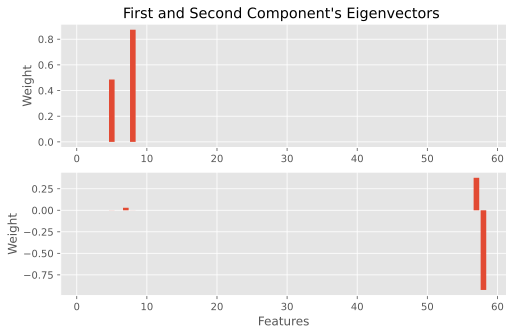

In [73]:
import scipy as sp
from scipy.cluster.vq import kmeans2

SN = big_var_df_train.drop('cluster', axis = 1).fillna(0)
labels_ = y_kmeans_batch_train   

# cluster with 3 random initial clusters
# PCA on orig. dataset 
# Xred will have only 2 columns, the first two princ. comps.
# evals has shape (4,) and evecs (4,4). We need all eigenvalues 
# to determine the portion of variance
Xred, evals, evecs = dim_red_pca(SN,2)   

xlab = '1. PC - ExpVar = {:.2f} %'.format(evals[0]/sum(evals)*100) # determine variance portion
ylab = '2. PC - ExpVar = {:.2f} %'.format(evals[1]/sum(evals)*100)
# plot the clusters, each set separately
plt.figure()    
ax = plt.gca()
scatterHs = []
clr = ['r', 'b', 'k', 'g']
for cluster in set(labels_):
    scatterHs.append(ax.scatter(Xred[labels_ == cluster, 0], Xred[labels_ == cluster, 1], 
                   color=clr[cluster], label='Cluster {}'.format(cluster)))
plt.legend(handles=scatterHs,loc=4)
plt.setp(ax, title='First and Second Principle Components', xlabel=xlab, ylabel=ylab)
# plot also the eigenvectors for deriving the influence of each feature
fig, ax = plt.subplots(2,1)
ax[0].bar(list(range(1, len(SN.columns)+1)),evecs[0])
plt.setp(ax[0], title="First and Second Component's Eigenvectors ", ylabel='Weight')
ax[1].bar(list(range(1, len(SN.columns)+1)),evecs[1])
plt.setp(ax[1], xlabel='Features', ylabel='Weight')

In [57]:
labels_.shape

(25002,)

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10,8), sharey = True)
fig.subplots_adjust(hspace=0.3)
plt.rcParams.update({'font.size':10})

plot_counter  = [[0,0], [0,1], [1,0],[1,1]]
no_clusters = big_var_df['cluster'].unique()

for cl, i in zip(no_clusters, plot_counter):

    rolling_window = 300

    clust = pd.DataFrame(data = big_var_df[big_var_df['cluster'] == cl][traffic_cols].values, columns = traffic_cols)
    clust_smoothed = clust.rolling(rolling_window, center = True, min_periods=1).mean()
    #     clust_mean_traf = clust.assign(mean_traf = clust.apply(lambda x: x.mean(), axis = 1))
    sns.lineplot(ax=axes[i[0],i[1]], x=clust_smoothed.index, y=clust_smoothed.iloc[: , 0].values)
    sns.lineplot(ax=axes[i[0],i[1]], x=clust_smoothed.index, y=clust_smoothed.iloc[: , 1].values)
    sns.lineplot(ax=axes[i[0],i[1]], x=clust_smoothed.index, y=clust_smoothed.iloc[: , 2].values)
    sns.lineplot(ax=axes[i[0],i[1]], x=clust_smoothed.index, y=clust_smoothed.iloc[: , 3].values)
    axes[i[0],i[1]].set_title('cluster ' + str(cl))



# sns.legend(traffic_cols);


In [ ]:
big_var_df['cluster'].unique()

In [ ]:
temp = pd.DataFrame(data = big_var_df[big_var_df['cluster'] == 3]['traff_m5'].values)
temp_smoothed = temp.rolling(200, center = True, min_periods=1).mean()


plt.figure(figsize=(5, 5))
plt.ylabel("traff_m5")
plt.xlabel("instance no")
plt.plot(temp, label="initial")
plt.plot(temp_smoothed, label="smoothed")

plt.legend();

In [ ]:
temp = pd.DataFrame(data = big_var_df[big_var_df['cluster'] == 0]['traff_m5'].values)
temp_smoothed = temp.rolling(200, center = True, min_periods=1).mean()


plt.figure(figsize=(10, 5))
plt.ylabel("traff_m5")
plt.xlabel("instance no")
plt.plot(temp, label="initial")
plt.plot(temp_smoothed, label="smoothed")

plt.legend();

In [ ]:
sns.relplot(data=big_var_df[traffic_cols + ['cluster']], kind="line", col = 'cluster')

In [ ]:
cov = data_train[num_cols_list].cov()
vals, vecs = scipy.linalg.eig(cov)

import decimal

for i, val in enumerate(vals):
    print('var {}: '.format(i+1), decimal.Decimal(val.real))

In [90]:
totals_for_pca = ['MV_ARPU', 'MV_ap_4G_d', 'MV_AP_total','clc_no_vas_roam_std_mnt3']
dpi_for_pca = ['dpi_duration', 'dpi_upload', 'dpi_download', 'dpi_events']

In [91]:
traffic_cols = ['traff_m5', 'traff_m3','traff_m2','traff_m1']
traffic_cols.sort()
traffic_cols_plus_target = ['traff_m5', 'traff_m3','traff_m2','traff_m1', 'target']
traffic_cols_plus_target.sort()

In [ ]:
traffic_cols_plus_target

In [78]:
data_train_num_filtered.columns

Index(['MV_Traf_2G_d_Mb', 'MV_Traf_3G_d_Mb', 'MV_Traf_4G_d_Mb',
       'MV_ap_innet_out_v', 'non_accum_internet_vol_max_mnt3',
       'data_3g_tar_vol_mea_mnt3', 'data_3g_tv_cnt_max_mnt1',
       'content_cnt_mea_mnt3', 'all_cnt_mea_mnt3', 'dpi_day_cnt', 'target',
       'traff_m5', 'traff_m3', 'traff_m2', 'traff_m1', 'var_quant', 'var',
       'target'],
      dtype='object')

In [ ]:
data_train_

### TRAIN-TEST

In [92]:
data_train_num_filtered = data_train_num_filtered.fillna(0)
data_test_num_filtered = data_test_num_filtered.fillna(0)


In [93]:
sc_x_traf = StandardScaler()

X_train_std = sc_x_traf.fit_transform(data_train_num_filtered[totals_for_pca])
X_test_std = sc_x_traf.fit_transform(data_test_num_filtered[totals_for_pca])

pca_train = PCA(random_state=3)
pca_test = PCA(random_state=3)

X_train_pca_totals = pca_train.fit_transform(X_train_std)
X_test_pca_totals = pca_test.fit_transform(X_train_std)

pd.DataFrame(pca_train.explained_variance_ratio_).style.format("{:.2%}")


,0
0,85.18%
1,9.68%
2,5.08%
3,0.06%


In [94]:
sc_x_traf = StandardScaler()

X_train_std = sc_x_traf.fit_transform(data_train_num_filtered[dpi_for_pca])
X_test_std = sc_x_traf.fit_transform(data_test_num_filtered[dpi_for_pca])

pca_train = PCA(random_state=3)
pca_test = PCA(random_state=3)

X_train_pca_dpi = pca_train.fit_transform(X_train_std)
X_test_pca_dpi = pca_test.fit_transform(X_train_std)

pd.DataFrame(pca_train.explained_variance_ratio_).style.format("{:.2%}")

,0
0,68.30%
1,16.84%
2,8.45%
3,6.40%


In [95]:
sc_x_traf = StandardScaler()

X_train_std = sc_x_traf.fit_transform(data_train_num_filtered[totals_for_pca])
X_test_std = sc_x_traf.fit_transform(data_test_num_filtered[totals_for_pca])

pca_train = PCA(n_components = 1, random_state=3)
pca_test = PCA(n_components = 1, random_state=3)

X_train_pca_totals = pca_train.fit_transform(X_train_std)
X_test_pca_totals = pca_test.fit_transform(X_test_std)



sc_x_traf = StandardScaler()

X_train_std = sc_x_traf.fit_transform(data_train_num_filtered[dpi_for_pca])
X_test_std = sc_x_traf.fit_transform(data_test_num_filtered[dpi_for_pca])

pca_train = PCA(n_components = 2, random_state=3)
pca_test = PCA(n_components = 2, random_state=3)

X_train_pca_dpi = pca_train.fit_transform(X_train_std)
X_test_pca_dpi = pca_test.fit_transform(X_test_std)


del(X_train_std, X_test_std)

In [186]:
traffic_cols

['traff_m1', 'traff_m2', 'traff_m3', 'traff_m5']

In [96]:
enum = np.arange(1, len(traffic_cols)+1, 1)
data_train_num_filtered = data_train_num_filtered.assign(slope_traff = data_train_num_filtered.apply(
    lambda x: linregress(enum, x[traffic_cols]).slope, axis=1))

data_test_num_filtered = data_test_num_filtered.assign(slope_traff = data_test_num_filtered.apply(
    lambda x: linregress(enum, x[traffic_cols]).slope, axis=1))


In [35]:
data_train_num_filtered.columns

Index(['traff_m1', 'traff_m2', 'traff_m3', 'traff_m5', 'var_quant',
       'dpi_duration', 'clc_no_vas_roam_std_mnt3', 'dpi_events', 'dpi_day_cnt',
       'content_cnt_mea_mnt3', 'data_3g_tv_cnt_std_mnt1', 'all_cnt_mea_mnt3',
       'all_clc_std_mnt3', 'MV_ARPU', 'dpi_download', 'dpi_upload',
       'data_3g_tar_vol_std_mnt3', 'non_accum_internet_vol_std_mnt3',
       'gprs_tar_vol_std_mnt3', 'MV_ap_4G_d', 'MV_ap_innet_out_v',
       'MV_AP_total', 'MV_Traf_2G_d_Mb', 'MV_Traf_3G_d_Mb', 'MV_Traf_4G_d_Mb',
       'var', 'target', 'slope_traff'],
      dtype='object')

In [ ]:
enum = np.arange(1, len(traffic_cols)+1, 1)
data_traffic = data_traffic.assign(slope_traff = data_traffic.apply(
    lambda x: linregress(enum, x[traffic_cols]).slope, axis=1))

data_traffic_test = data_traffic_test.assign(slope_traff = data_traffic_test.apply(
    lambda x: linregress(enum, x[traffic_cols]).slope, axis=1))

In [33]:
data_train_num_filtered.head()

,traff_m1,traff_m2,traff_m3,traff_m5,var_quant,dpi_duration,clc_no_vas_roam_std_mnt3,dpi_events,dpi_day_cnt,content_cnt_mea_mnt3,data_3g_tv_cnt_std_mnt1,all_cnt_mea_mnt3,all_clc_std_mnt3,MV_ARPU,dpi_download,dpi_upload,data_3g_tar_vol_std_mnt3,non_accum_internet_vol_std_mnt3,gprs_tar_vol_std_mnt3,MV_ap_4G_d,MV_ap_innet_out_v,MV_AP_total,MV_Traf_2G_d_Mb,MV_Traf_3G_d_Mb,MV_Traf_4G_d_Mb,var,target
index,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.979661,0.005645,0.092987,0.932736,3,2910.0,3.446742,123.0,1.0,2.650892,0.000000,5.155217,3.446742,4.214594,5.632659e+06,428502.0,10.553101,10.601070,0.000000,4.091428,0.671478,4.214594,1.912639,0.000000,0.000000,0.275784,0.000000
1,3.556069,4.519390,4.080437,3.488962,3,1473255.0,3.596533,115934.0,30.0,2.427748,1.863570,5.287425,3.596533,4.374884,3.977350e+09,702241519.0,11.637591,12.811627,11.518863,4.319560,0.310149,4.374884,7.987806,6.553853,7.113706,0.234313,4.247739
2,0.258421,0.216497,0.276031,0.431192,1,130615.0,3.546398,38266.0,30.0,2.519040,2.453601,4.545951,3.649520,4.660602,2.043249e+08,26855312.0,10.342379,10.379273,8.544412,4.206008,0.261482,4.270920,3.698440,5.247543,0.000000,0.008803,0.173939
3,0.000000,0.128936,0.060330,0.120501,0,4822113.0,0.000000,207344.0,18.0,1.945910,0.693147,3.470931,0.000000,0.000000,7.590099e+07,54284070.0,8.859231,9.780669,9.282859,0.000000,0.000000,0.000000,4.031506,3.700565,0.000000,0.003599,0.167172
4,6.695070,1.696576,2.260957,1.861093,7,259131.0,3.465262,39715.0,30.0,3.381561,2.992100,5.870473,3.643763,4.903822,1.702131e+09,83882931.0,13.075381,13.287434,3.705438,4.776183,1.069614,4.900325,3.027172,6.473676,7.021794,5.709928,1.519250


#### preparing data for modelling

In [116]:
droppers = ['gprs_tar_vol_mea_mnt3', 'all_clc_mea_mnt3', 'var']



In [ ]:
data_train_num_filtered = data_train_num_filtered.merge(data_train['all_clc_mea_mnt3'], 
                                                        left_index = True, right_index = True)
data_test_num_filtered = data_test_num_filtered.merge(data_test['all_clc_mea_mnt3'], 
                                                        left_index = True, right_index = True)



del(data_train, data_test)

In [111]:
data_train_num_filtered.columns

Index(['MV_Traf_2G_d_Mb', 'MV_Traf_3G_d_Mb', 'MV_Traf_4G_d_Mb', 'MV_ARPU',
       'MV_ap_4G_d', 'MV_ap_innet_out_v', 'MV_AP_total',
       'non_accum_internet_vol_max_mnt3', 'gprs_tar_vol_mea_mnt3',
       'data_3g_tar_vol_mea_mnt3', 'data_3g_tv_cnt_max_mnt1',
       'content_cnt_mea_mnt3', 'clc_no_vas_roam_std_mnt3', 'all_cnt_mea_mnt3',
       'all_clc_mea_mnt3', 'dpi_duration', 'dpi_upload', 'dpi_download',
       'dpi_events', 'dpi_day_cnt', 'target', 'traff_m5', 'traff_m3',
       'traff_m2', 'traff_m1', 'var', 'var_quant', 'slope_traff'],
      dtype='object')

In [ ]:
data_test_num_filtered = data_test_num_filtered.drop(droppers, axis = 1)
data_train_num_filtered = data_train_num_filtered.drop(droppers, axis = 1)

In [67]:
data_train_model.iloc[0, :]

traff_m1                            0.979661
traff_m2                            0.005645
traff_m3                            0.092987
traff_m5                            0.932736
var_quant                           3.000000
dpi_day_cnt                         1.000000
content_cnt_mea_mnt3                2.650892
data_3g_tv_cnt_std_mnt1             0.000000
all_cnt_mea_mnt3                    5.155217
data_3g_tar_vol_std_mnt3           10.553101
non_accum_internet_vol_std_mnt3    10.601070
MV_ap_innet_out_v                   0.671478
MV_Traf_2G_d_Mb                     1.912639
MV_Traf_3G_d_Mb                     0.000000
MV_Traf_4G_d_Mb                     0.000000
target                              0.000000
slope_traff                        -0.005343
pca1                                0.806958
pca2                               -1.095599
pca3                                0.143381
Name: 0, dtype: float64

In [185]:
data_train_model.loc[108, :]
# data_train_model[data_train_model['var_quant'] != 9]['var_quant'].unique()

MV_Traf_2G_d_Mb                     8.734410
MV_Traf_3G_d_Mb                     4.503460
MV_Traf_4G_d_Mb                    10.492021
MV_ap_innet_out_v                   0.066976
non_accum_internet_vol_max_mnt3    16.376745
data_3g_tar_vol_mea_mnt3           12.924332
data_3g_tv_cnt_max_mnt1             3.663562
content_cnt_mea_mnt3                2.224624
all_cnt_mea_mnt3                    5.222606
dpi_day_cnt                        30.000000
target                             24.615115
traff_m5                           16.890106
traff_m3                           29.949622
traff_m2                           35.416218
traff_m1                           33.929386
var_quant                           9.000000
slope_traff                        -5.658444
pca1                                1.684086
pca2                                3.401365
pca3                                0.314296
Name: 108, dtype: float64

In [199]:
data_train_model = data_train_num_filtered.drop(totals_for_pca, axis=1).fillna(0)
data_train_model = data_train_model.drop(dpi_for_pca, axis=1)
data_train_model = data_train_model.assign(pca1=X_train_pca_totals[:, 0],
                                           pca2=X_train_pca_dpi[:, 0],
                                           pca3=X_train_pca_dpi[:, 1])

pca_list = ['pca1', 'pca2', 'pca3']


data_train_model = data_train_model.drop(droppers, axis = 1)

data_train_model_varQ90 = data_train_model[data_train_model['var_quant'] == 9][pca_list]
data_train_model_varQ90 = data_train_model_varQ90.merge(big_var_df_train,
                                                       left_index = True, right_index = True)

data_train_model_full = data_train_model
data_train_model = data_train_model[data_train_model['var_quant'] != 9]

data_train_model_varQ90 = data_train_model_varQ90.fillna(0)

In [200]:
data_test_model = data_test_num_filtered.drop(totals_for_pca, axis=1).fillna(0)
data_test_model = data_test_model.drop(dpi_for_pca, axis=1)
data_test_model = data_test_model.assign(pca1=X_test_pca_totals[:, 0],
                                         pca2=X_test_pca_dpi[:, 0],
                                         pca3=X_test_pca_dpi[:, 1])

data_test_model = data_test_model.drop(droppers, axis = 1)

data_test_model_varQ90 = data_test_model[data_test_model['var_quant'] == 9][pca_list]
data_test_model_varQ90 = data_test_model_varQ90.merge(big_var_df_test,
                                                      left_index = True, right_index = True)

data_test_model_full = data_test_model
data_test_model = data_test_model[data_test_model['var_quant'] != 9]

data_test_model_varQ90 = data_test_model_varQ90.fillna(0)

In [201]:
X, y = data_train_model.loc[:, data_train_model.columns != 'target'], data_train_model.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 17)

X_full, y_full = data_test_model_full.loc[:, data_test_model_full.columns != 'target'], data_test_model_full.target
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.30, random_state = 17)

X_varQ90 = data_train_model_varQ90.loc[:, data_train_model_varQ90.columns != 'target']
y_varQ90 = data_train_model_varQ90.target
    
X_train_varQ90, X_test_varQ90, y_train_varQ90, y_test_varQ90 = train_test_split(X_varQ90, y_varQ90, 
                                                                                test_size=0.30, random_state = 17)

In [206]:
X_test_test, y_test_test = data_test_model.loc[:, data_test_model.columns != 'target'], data_test_model.target
X_test_test_full = data_test_model_full.loc[:, data_test_model_full.columns != 'target']
y_test_test_full = data_test_model_full.target

X_test_test_varQ90 = data_test_model_varQ90.loc[:, data_test_model_varQ90.columns != 'target']
y_test__test_varQ90 = data_test_model_varQ90.target


In [ ]:
# LINEAR REGRESSION RESULTS


# cols_traff_only = ['traff_m5', 'traff_m4', 'traff_m3', 'traff_m2', 'traff_m1']
# Slope: 0.15
# Intercept: 1.30
# RMSE train: 8.584659, test: 8.514558
# R^2 train: 0.474909, test: 0.492442


#hight corr target columns, stats chosen by highest correlation with target

#MV_Traf_2G_d_Mb','MV_Traf_3G_d_Mb','MV_Traf_4G_d_Mb','MV_ARPU','MV_ap_4G_d','MV_ap_innet_out_v','MV_AP_total',
#'non_accum_internet_vol_max_mnt3','gprs_tar_vol_mea_mnt3','data_3g_tar_vol_mea_mnt3','data_3g_tv_cnt_max_mnt1',
# 'content_cnt_mea_mnt3','clc_no_vas_roam_std_mnt3','all_cnt_mea_mnt3','all_clc_mea_mnt3','dpi_duration','dpi_upload',
# 'dpi_download','dpi_events','dpi_day_cnt','target','traff_m5','traff_m3','traff_m2', 'traff_m1']
# Slope: 0.04
# Intercept: -2.23
# RMSE train: 8.511254, test: 8.466906
# R^2 train: 0.483850, test: 0.498107


#withou traffic columns with their STD instead
# Slope: 0.02
# Intercept: -3.36
# RMSE train: 8.940543, test: 8.900981
# R^2 train: 0.430470, test: 0.445326


#pca1 and pca2 instead of traffic columns
# Slope: 0.04
# Intercept: 2.00
# RMSE train: 8.640514, test: 8.599313
# R^2 train: 0.468054, test: 0.482287



#all data standard scaled
# Slope: 0.01
# Intercept: 0.00
# RMSE train: 0.000000, test: 8.466906
# R^2 train: 1.000000, test: 0.498107

#totals_for_pca + dpi_for_pca  = one PCA taken from totals, 2 from dpi

# Slope: 0.04
# Intercept: 2656217253792.36
# RMSE train: 8.374349, test: 8.331864
# R^2 train: 0.500321, test: 0.513989

# with traffic variance quantiles, different regression model by quantile 
# Train set results

# RMSE train: 7.998114, test: 8.066895
# R^2 train: 0.543879, test: 0.545170

# Test set results

# RMSE test_test: 8.130670
# R^2 test_test: 0.511574

# with traffic variance quantiles, different regression model by quantile + slope coeff for traffic data

# Train set results

# RMSE train: 7.998114, test: 8.066895
# R^2 train: 0.543879, test: 0.545170

# Test set results

# RMSE test_test: 8.130670
# R^2 test_test: 0.511574

# with traffic variance quantiles, different regression model by quantile + slope coeff for traffic data
#gprs_tar_vol_mea_mnt3 column dropped based on low coefficients 

# Train set results

# RMSE train: 7.998185, test: 8.067140
# R^2 train: 0.543871, test: 0.545142

# Test set results

# RMSE test_test: 8.130594
# R^2 test_test: 0.511583
    
#Choosing features by regression coefficients did not work out!!!



In [134]:
X_train.head()

,MV_Traf_2G_d_Mb,MV_Traf_3G_d_Mb,MV_Traf_4G_d_Mb,MV_ap_innet_out_v,non_accum_internet_vol_max_mnt3,data_3g_tar_vol_mea_mnt3,data_3g_tv_cnt_max_mnt1,content_cnt_mea_mnt3,all_cnt_mea_mnt3,dpi_day_cnt,traff_m5,traff_m3,traff_m2,traff_m1,var_quant,slope_traff,pca1,pca2,pca3
index,,,,,,,,,,,,,,,,,,,
47623,4.710470,0.000000,8.087805,0.261482,14.765124,8.377711,1.791759,2.268684,3.776585,6.0,0.000071,0.000000,3.285484,3.064549,6,-1.247892,0.789995,-0.588849,0.151719
88879,2.624687,8.376641,0.000000,0.261482,14.068656,13.712896,3.688879,3.733693,4.852681,30.0,5.894611,3.055133,3.544314,4.863172,5,0.260514,0.870530,0.406614,-0.643185
153423,1.957863,0.000000,0.000000,0.043426,7.358858,0.000000,0.000000,0.000000,3.599593,30.0,0.005789,0.005677,0.005950,0.005833,0,-0.000040,-1.898924,-0.882607,-0.049942
88824,5.886602,7.735412,5.323384,0.163164,14.533533,12.300498,2.944439,1.152680,5.409411,25.0,0.000000,0.000000,2.754301,1.111771,5,-0.608961,1.238606,-0.288916,-0.094392
234780,3.446921,4.940950,6.584944,0.045742,13.607571,7.210039,1.945910,2.197225,3.616309,9.0,0.000000,0.000000,0.865997,0.650147,3,-0.281644,1.122674,-0.864740,0.099082


In [207]:
#Regression on all train data 

slr = LinearRegression()

slr.fit(X_train_full, y_train_full)


print('Slope: {:.2f}'.format(slr.coef_[0]))
print('Intercept: {:.2f}'.format(slr.intercept_))

y_train_pred = slr.predict(X_train_full)
y_test_pred = slr.predict(X_test_full)

print()
print('Train set results')
print()
print('RMSE train: {:.6f}, test: {:.6f}'.format(
        mean_squared_error(y_train_full, y_train_pred, squared = False),
        mean_squared_error(y_test_full, y_test_pred, squared = False)))
print('R^2 train: {:.6f}, test: {:.6f}'.format(
        r2_score(y_train_full, y_train_pred),
        r2_score(y_test_full, y_test_pred)))



y_test_test_pred = slr.predict(X_test_test_full)

print()
print('Test set results')
print()
print('RMSE test_test: {:.6f}'.format(
        mean_squared_error(y_test_test_full, y_test_test_pred, squared = False)))
print('R^2 test_test: {:.6f}'.format(
        r2_score(y_test_test_full, y_test_test_pred)))

Slope: 0.07
Intercept: -0.94

Train set results

RMSE train: 8.751721, test: 8.667029
R^2 train: 0.435439, test: 0.442735

Test set results

RMSE test_test: 8.726400
R^2 test_test: 0.437619


In [124]:
X_list, y_list = [], []
df_list = []

coeff = []

for g, v in data_train_model.groupby('var_quant'):
    
    X_list.append(v.loc[:, v.columns != 'target'])
    y_list.append(v.target)
    
#Adding data with 90th qauntile by traffic variance

X_list.append(data_train_model_varQ90.loc[:, data_train_model_varQ90.columns != 'target'])
y_list.append(data_train_model_varQ90.target)  


for i, j in zip(X_list, y_list):
    df_list.append(train_test_split(i, j, test_size=0.30, train_size = 0.70, random_state = 13))
    

y_train_pred, y_test_pred, y_train, y_test = pd.Series(), pd.Series(), pd.Series(), pd.Series()

for X_tr, X_ts, y_tr, y_ts in df_list:
    slr = LinearRegression()

    slr.fit(X_tr, y_tr)
    train_pred = pd.Series(data = slr.predict(X_tr), index=y_tr.index)
    y_train_pred = y_train_pred.append(train_pred)
#     print(y_train_pred.shape)
    
    test_pred = pd.Series(data = slr.predict(X_ts), index=y_ts.index)
    y_test_pred = y_test_pred.append(test_pred)
    
    y_train = y_train.append(y_tr)
    y_test = y_test.append(y_ts) 
    
    print(str(X_tr['var_quant'].unique()[0])+' quantile set results')
    print()

    print('RMSE train: {:.6f}, test: {:.6f}'.format(
        mean_squared_error(y_tr, train_pred, squared = False),
        mean_squared_error(y_ts, test_pred, squared = False)))
    print('R^2 train: {:.6f}, test: {:.6f}'.format(
        r2_score(y_tr, train_pred),
        r2_score(y_ts, test_pred)))
    print()
    
    coeff.append(slr.coef_)    
    
    joblib_file = "joblib_model"+"_q"+str(X_tr['var_quant'].unique()[0])+".pkl"
    joblib.dump(slr, joblib_file)

print('RMSE train TOTAL: {:.6f}, test TOTAL: {:.6f}'.format(
mean_squared_error(y_train, y_train_pred, squared = False),
mean_squared_error(y_test, y_test_pred, squared = False)))  

0 quantile set results

RMSE train: 1.750987, test: 1.881821
R^2 train: 0.021369, test: 0.014896

1 quantile set results

RMSE train: 2.015996, test: 1.817935
R^2 train: 0.076662, test: 0.092099

2 quantile set results

RMSE train: 2.681939, test: 2.403022
R^2 train: 0.174956, test: 0.104856

3 quantile set results

RMSE train: 2.718937, test: 3.194466
R^2 train: 0.234665, test: 0.196575

4 quantile set results

RMSE train: 3.750053, test: 3.619593
R^2 train: 0.229893, test: 0.252087

5 quantile set results

RMSE train: 4.783464, test: 4.796119
R^2 train: 0.285001, test: 0.290670

6 quantile set results

RMSE train: 6.221220, test: 5.802970
R^2 train: 0.321300, test: 0.329537

7 quantile set results

RMSE train: 8.233945, test: 8.393347
R^2 train: 0.353520, test: 0.362221

8 quantile set results

RMSE train: 11.987512, test: 12.057738
R^2 train: 0.367393, test: 0.351314

9 quantile set results

RMSE train: 19.918420, test: 20.035230
R^2 train: 0.284097, test: 0.261488

RMSE train TOTAL

In [208]:
coeff[9].sort

array([-8.62658134e-02,  1.52197160e-05, -1.31475850e-06,  1.47426538e-01,
       -3.80520899e-02,  8.70101342e-03,  1.74238350e-01,  7.93613060e-01,
       -5.06794449e-01, -8.55195154e-01,  1.16727503e-01,  2.86210762e-02,
        4.29011865e-02,  1.76452044e-01, -1.44593202e+00, -3.40916987e-01,
        6.52316693e-01,  1.24180435e+00,  1.03400775e-07,  2.32425926e-10,
        2.22355807e-10, -6.15627073e-06,  4.65571284e-02,  1.37722013e-01,
        7.25970324e-02, -1.39781101e-01,  3.83663731e-01, -6.59222847e-04,
        2.06501483e-14,  1.50537474e+00, -2.16018388e+00, -7.56009228e-01,
        2.01585528e+00,  9.26074282e-01, -1.08071965e+00,  1.23452978e+00,
        1.05054712e+00, -3.25126998e+00, -5.35938641e-01,  1.67408237e+00,
        3.00547052e+00, -2.28891620e+00,  1.72557173e-01, -4.65223337e-01,
       -6.14790172e+00,  1.32481041e+01, -7.84662743e+00, -6.49544068e+00,
       -1.00257412e+01, -8.53582113e-02,  4.76491110e+00,  5.75458419e-01,
        6.66133815e-16, -

In [222]:
temp = pd.DataFrame(data = coeff[9], index=X_tr.columns, columns=['coeff'])

In [224]:
temp.sort_values(by = 'coeff').style.format("{:.6}")

,coeff
device_type_tablet,-10.0257
device_type_phone,-7.84663
device_type_smartphone,-6.49544
device_type_modem,-6.1479
device_brand_prestigio,-3.25127
device_has_gprs,-2.28892
device_brand_nokia,-2.16018
content_cnt_mea_mnt3,-1.44593
device_brand_lg,-1.08072
serv_VF_bonus,-1.05124


In [ ]:
df_coeff= pd.DataFrame()

for i in coeff:
    
    df_coeff= df_coeff.append(pd.Series(i), ignore_index = True)

df_coeff.columns = X_train.columns

def abs_more_than_0_02(value): 
    
    if abs(value) > 0.02:
        color = 'green'
    else:
        color = 'red'
        
    return 'color: %s' % color
    

df_coeff.T.style.applymap(abs_more_than_0_02)


In [ ]:
feature_list_by_var_quantile = []
df_coeff = df_coeff.T
for col in df_coeff.columns:
    feature_list_by_var_quantile.append(df_coeff[(df_coeff[col] > 0.02)|(df_coeff[col] < -0.02)].index)


In [130]:
X_list, y_list = [], []
df_list = []


for g, v in data_test_model.groupby('var_quant'):
    
    X_list.append(v.loc[:, v.columns != 'target'])
    y_list.append(v.target)
    
X_list.append(data_test_model_varQ90.loc[:, data_test_model_varQ90.columns != 'target'])
y_list.append(data_test_model_varQ90.target) 
    
for i, j in zip(X_list, y_list):
    df_list.append([i,j])
    
y_test_test_pred, y_test_test = pd.Series(), pd.Series()

for X_ts, y_ts in df_list:
    
    joblib_file = "joblib_model"+"_q"+str(X_ts['var_quant'].unique()[0])+".pkl"
    slr = joblib.load(joblib_file)
    

    test_test_pred = pd.Series(data = slr.predict(X_ts), index=y_ts.index)
    y_test_test_pred = y_test_test_pred.append(test_test_pred)
    
    
    print(str(X_ts['var_quant'].unique()[0])+' quantile set results')
    print()

    print('RMSE test: {:.6f}'.format(
        mean_squared_error(y_ts, test_test_pred, squared = False)))
    print('R^2 train: {:.6f}'.format(
        r2_score(y_ts, test_test_pred)))
   
    y_test_test = y_test_test.append(y_ts) 
    
   

0 quantile set results

RMSE test: 2.419015
R^2 train: -1.022637
1 quantile set results

RMSE test: 2.149385
R^2 train: 0.068571
2 quantile set results

RMSE test: 2.502422
R^2 train: 0.041371
3 quantile set results

RMSE test: 3.371109
R^2 train: 0.168217
4 quantile set results

RMSE test: 4.350451
R^2 train: 0.202057
5 quantile set results

RMSE test: 5.033298
R^2 train: 0.264925
6 quantile set results

RMSE test: 6.527811
R^2 train: 0.287671
7 quantile set results

RMSE test: 9.071623
R^2 train: 0.298908
8 quantile set results

RMSE test: 12.724517
R^2 train: 0.306792
9 quantile set results

RMSE test: 20.036257
R^2 train: 0.209382


In [ ]:
X_ts_increase = X_ts[X_ts['slope_traff'] > 0 ]
X_ts_increase.head(20)

In [ ]:
plt.scatter(y_ts, test_test_pred, color = "red")
plt.plot(y_ts, slr.predict(X_ts), color = "green")
# plt.title("Salary vs Experience (Training set)")
plt.xlabel("y_real")
plt.ylabel("y_predicted")
plt.show()

In [ ]:
# data_nulls_filled0_test_pred = data_nulls_filled0_test.merge(y_test_test_pred.rename('y_pred'), \
#                                                              left_index=True, right_index=True)

# data_nulls_filled0_pred = X_train.merge(y_train.rename('target'), \
#                                                              left_index=True, right_index=True)
# data_nulls_filled0_pred = data_nulls_filled0_pred.merge(y_train_pred.rename('y_pred'), \
#                                                              left_index=True, right_index=True)

# data_nulls_filled0_test_pred.groupby('var_quant')[('target', 'y_pred')].describe()

# data_nulls_filled0_pred.groupby('var_quant')[('target', 'y_pred')].describe()

In [131]:
print('Train set results')
print()

print('RMSE train: {:.6f}, test: {:.6f}'.format(
        mean_squared_error(y_train, y_train_pred, squared = False),
        mean_squared_error(y_test, y_test_pred, squared = False)))
print('R^2 train: {:.6f}, test: {:.6f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))


print()
print('Test set results')
print()
print('RMSE test_test: {:.6f}'.format(
        mean_squared_error(y_test_test, y_test_test_pred, squared = False)))
print('R^2 test_test: {:.6f}'.format(
        r2_score(y_test_test, y_test_test_pred)))

Train set results

RMSE train: 8.399885, test: 8.423478
R^2 train: 0.500745, test: 0.493990

Test set results

RMSE test_test: 8.721458
R^2 test_test: 0.438256


In [ ]:
# plt.scatter(y_test, y_test_pred)

In [ ]:
# LASSO Results

# cols_traff_only = ['traff_m5', 'traff_m4', 'traff_m3', 'traff_m2', 'traff_m1']
# RMSE train: 8.585720, test: 8.520605
# R^2 train: 0.474779, test: 0.491720


##hight corr target columns, stats chosen by highest correlation with target
# ALPHA = 0.01

#MV_Traf_2G_d_Mb','MV_Traf_3G_d_Mb','MV_Traf_4G_d_Mb','MV_ARPU','MV_ap_4G_d','MV_ap_innet_out_v','MV_AP_total',
#'non_accum_internet_vol_max_mnt3','gprs_tar_vol_mea_mnt3','data_3g_tar_vol_mea_mnt3','data_3g_tv_cnt_max_mnt1',
# 'content_cnt_mea_mnt3','clc_no_vas_roam_std_mnt3','all_cnt_mea_mnt3','all_clc_mea_mnt3','dpi_duration','dpi_upload',
# 'dpi_download','dpi_events','dpi_day_cnt','target','traff_m5','traff_m3','traff_m2', 'traff_m1']

# RMSE train: 8.519896, test: 8.471351
# R^2 train: 0.482802, test: 0.497580


#withou traffic columns with their STD instead
#RMSE train: 8.948037, test: 8.904686
# R^2 train: 0.429515, test: 0.444865

#pca1 and pca2 instead of traffic columns
# RMSE train: 8.653119, test: 8.603949
# R^2 train: 0.466500, test: 0.481728

#totals_for_pca + dpi_for_pca  = one PCA taken from totals, 2 from dpi
# RMSE train: 8.518591, test: 8.470900
# R^2 train: 0.482960, test: 0.497633

In [ ]:
sc_y = StandardScaler()
sc_x = StandardScaler()


X_train_std = sc_x.fit_transform(X_train)
X_test_std = sc_x.transform(X_test)
y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()


In [ ]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_std,y_train_std)
y_train_pred_std = lasso.predict(X_train_std)
y_test_pred_std = lasso.predict(X_test_std)

print('RMSE train: {:.6f}, test: {:.6f}'.format(
        mean_squared_error(y_train, sc_y.inverse_transform(y_train_pred_std), squared = False),
        mean_squared_error(y_test, sc_y.inverse_transform(y_test_pred_std), squared = False)))
print('R^2 train: {:.6f}, test: {:.6f}'.format(
        r2_score(y_train, sc_y.inverse_transform(y_train_pred_std)),
        r2_score(y_test, sc_y.inverse_transform(y_test_pred_std))))

In [ ]:
alpha = np.linspace(0.01,0.4,10)
r2_train =[]
r2_test =[]
RMSE_train = []
RMSE_test = []
norm = []
alpha = np.linspace(0.01,0.4,10)
for i in range(10):
    lasso = Lasso(alpha = alpha[i])
    lasso.fit(X_train_std,y_train_std)
    y_train_std = lasso.predict(X_train_std)
    y_test_std = lasso.predict(X_test_std)
    r2_train = np.append(r2_train,
              r2_score(y_train,sc_y.inverse_transform(y_train_std)))
    r2_test = np.append(r2_test,
              r2_score(y_test,sc_y.inverse_transform(y_test_std)))
    RMSE_train = np.append(RMSE_train, 
                        mean_squared_error(y_train,sc_y.inverse_transform(y_train_std), squared = False))
    RMSE_test = np.append(RMSE_test, 
                        mean_squared_error(y_test,sc_y.inverse_transform(y_test_std), squared = False))
    
    norm = np.append(norm,np.linalg.norm(lasso.coef_))

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(alpha,RMSE_train,label='RMSE_train')
plt.plot(alpha,RMSE_train)
plt.scatter(alpha,RMSE_test,label='RMSE_test')
plt.plot(alpha,RMSE_test)
# plt.scatter(alpha,norm,label = 'norm')
# plt.plot(alpha,norm)
# plt.ylim(-0.1,1)
# plt.xlim(0,.43)
plt.xlabel('alpha', size = 14)
plt.ylabel('RMSE_score',size = 14)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(alpha,r2_train,label='r2_train')
plt.plot(alpha,r2_train)
plt.scatter(alpha,r2_test,label='r2_test')
plt.plot(alpha,r2_test)
plt.scatter(alpha,norm,label = 'norm')
plt.plot(alpha,norm)
plt.ylim(-0.1,1)
plt.xlim(0,.43)
plt.xlabel('alpha', size = 14)
plt.ylabel('R2_score',size = 14)
plt.legend()
plt.show()

In [ ]:
# LGBM REGRESSOR RESULTS
# 
# cols_traff_only = ['traff_m5', 'traff_m4', 'traff_m3', 'traff_m2', 'traff_m1']
# RMSE = 10.709416107561104

##hight corr target columns, stats chosen by highest correlation with target

#MV_Traf_2G_d_Mb','MV_Traf_3G_d_Mb','MV_Traf_4G_d_Mb','MV_ARPU','MV_ap_4G_d','MV_ap_innet_out_v','MV_AP_total',
#'non_accum_internet_vol_max_mnt3','gprs_tar_vol_mea_mnt3','data_3g_tar_vol_mea_mnt3','data_3g_tv_cnt_max_mnt1',
# 'content_cnt_mea_mnt3','clc_no_vas_roam_std_mnt3','all_cnt_mea_mnt3','all_clc_mea_mnt3','dpi_duration','dpi_upload',
# 'dpi_download','dpi_events','dpi_day_cnt','target','traff_m5','traff_m3','traff_m2', 'traff_m1']

#RMSE = 10.635576100742853


#withou traffic columns with their STD instead
# RMSE =10.712767746328739

#pca1 and pca2 instead of traffic columns

#RMSE = 10.647630252841243


In [ ]:
model = ltb.LGBMRegressor()

parameters = {'n_estimators':[30, 50, 70, 100, 150], 
              'max_depth':[4, 6, 8, 10], 
              'boosting_type': ['gbdt'],
              'objective': ['regression'],
              'is_unbalance': [True], 
              'random_state': [10], 
              'num_leaves': [30],
              'feature_fraction':[0.5],
              'bagging_fraction': [0.8], 
              'bagging_freq':[15],
              'learning_rate':[0.01]}


from sklearn.metrics import make_scorer
score_func = make_scorer(mean_squared_error, squared=False)


grid_search = GridSearchCV(model, parameters, verbose=1, scoring=score_func, n_jobs=-1)
res = grid_search.fit(X_train, y_train)

res



In [ ]:
print(f'Best score: {grid_search.best_score_}', '\n') 
print('Best parameters set:')

best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print(f'\t{param_name}:  {best_parameters[param_name]}')

In [ ]:
predictions = grid_search.predict(X_test)



In [ ]:
mean_squared_error(y_test, predictions, squared=False)

In [ ]:
#closs_val_score(model, X, y ... )
#from skearn.model_selection import GridSearchCV

In [ ]:
start = timer()

# Fit the model to the training data
y_kmeans = kmeans.fit_predict(X)

end = timer()
print(timedelta(seconds=end-start))